In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("C:/Users/F_cha/Downloads/HeartDiseaseTrain-Test.csv")

In [3]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0


In [4]:
df.isna().sum() # Ver la cantidad de valores vacíos en cada variable
df.dtypes # Ver tipo de variables

age                                int64
sex                               object
chest_pain_type                   object
resting_blood_pressure             int64
cholestoral                        int64
fasting_blood_sugar               object
rest_ecg                          object
Max_heart_rate                     int64
exercise_induced_angina           object
oldpeak                          float64
slope                             object
vessels_colored_by_flourosopy     object
thalassemia                       object
target                             int64
dtype: object

In [5]:
conteo_categorias = df['sex'].value_counts()

print(conteo_categorias)

conteo_categorias = df['fasting_blood_sugar'].value_counts()

print(conteo_categorias)

conteo_categorias = df['exercise_induced_angina'].value_counts()

print(conteo_categorias)

conteo_categorias = df['vessels_colored_by_flourosopy'].value_counts()

print(conteo_categorias)

Male      713
Female    312
Name: sex, dtype: int64
Lower than 120 mg/ml      872
Greater than 120 mg/ml    153
Name: fasting_blood_sugar, dtype: int64
No     680
Yes    345
Name: exercise_induced_angina, dtype: int64
Zero     578
One      226
Two      134
Three     69
Four      18
Name: vessels_colored_by_flourosopy, dtype: int64


In [6]:
# En la variable sexo reemplazaremos los valores como 1 hombre y 0 mujer
df['sex'] = df['sex'].replace(["Male"], 1)
df['sex'] = df['sex'].replace(["Female"], 0)

# En la variable fasting_blood_sugar reemplazaremos los valores de Más de 120 mg/ml como 1 y los valores Inferior a 120 mg/ml como 0
df['fasting_blood_sugar'] = df['fasting_blood_sugar'].replace(["Greater than 120 mg/ml"], 1)
df['fasting_blood_sugar'] = df['fasting_blood_sugar'].replace(["Lower than 120 mg/ml"], 0)

# En la variable exercise_induced_angina reemplazaremos los valores de yes como 1 y los valores no como 0
df['exercise_induced_angina'] = df['exercise_induced_angina'].replace(["Yes"], 1)
df['exercise_induced_angina'] = df['exercise_induced_angina'].replace(["No"], 0)

# En la variable vessels_colored_by_flourosopy reemplazaremos por sus correspondientes "número de vasos principales coloreados por fluoroscopia"
df['vessels_colored_by_flourosopy'] = df['vessels_colored_by_flourosopy'].replace(["Zero"], 0)
df['vessels_colored_by_flourosopy'] = df['vessels_colored_by_flourosopy'].replace(["One"], 1)
df['vessels_colored_by_flourosopy'] = df['vessels_colored_by_flourosopy'].replace(["Two"], 2)
df['vessels_colored_by_flourosopy'] = df['vessels_colored_by_flourosopy'].replace(["Three"], 3)
df['vessels_colored_by_flourosopy'] = df['vessels_colored_by_flourosopy'].replace(["Four"], 4)

In [7]:
conteo_categorias = df['chest_pain_type'].value_counts()

print(conteo_categorias)

conteo_categorias = df['rest_ecg'].value_counts()

print(conteo_categorias)

conteo_categorias = df['slope'].value_counts()

print(conteo_categorias)

conteo_categorias = df['thalassemia'].value_counts()

print(conteo_categorias)

Typical angina      497
Non-anginal pain    284
Atypical angina     167
Asymptomatic         77
Name: chest_pain_type, dtype: int64
ST-T wave abnormality           513
Normal                          497
Left ventricular hypertrophy     15
Name: rest_ecg, dtype: int64
Flat           482
Downsloping    469
Upsloping       74
Name: slope, dtype: int64
Fixed Defect         544
Reversable Defect    410
Normal                64
No                     7
Name: thalassemia, dtype: int64


In [8]:
df.dtypes

age                                int64
sex                                int64
chest_pain_type                   object
resting_blood_pressure             int64
cholestoral                        int64
fasting_blood_sugar                int64
rest_ecg                          object
Max_heart_rate                     int64
exercise_induced_angina            int64
oldpeak                          float64
slope                             object
vessels_colored_by_flourosopy      int64
thalassemia                       object
target                             int64
dtype: object

In [9]:
# Base lista para analizar

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

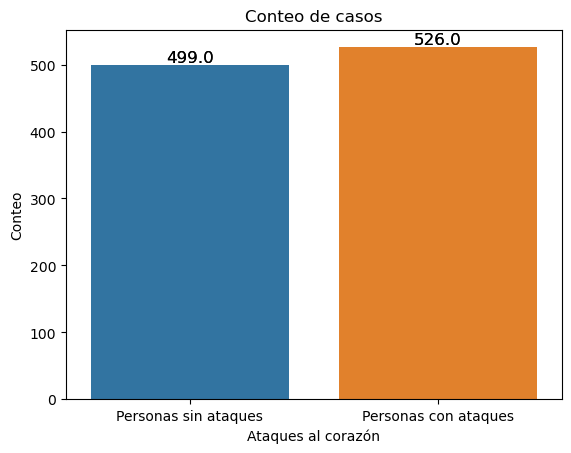

In [11]:
sns.countplot(x='target', data=df)

# Crear el gráfico de barras para la variable binaria
ax = sns.countplot(x='target', data=df)
# Personalizar las etiquetas del eje x
plt.xticks([0, 1], ['Personas sin ataques', 'Personas con ataques'])
# Agregar la cantidad en cada barra
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=12)

# Agregar título y etiquetas de los ejes
plt.title('Conteo de casos')
plt.xlabel('Ataques al corazón')
plt.ylabel('Conteo')

# Mostrar el gráfico
plt.show()

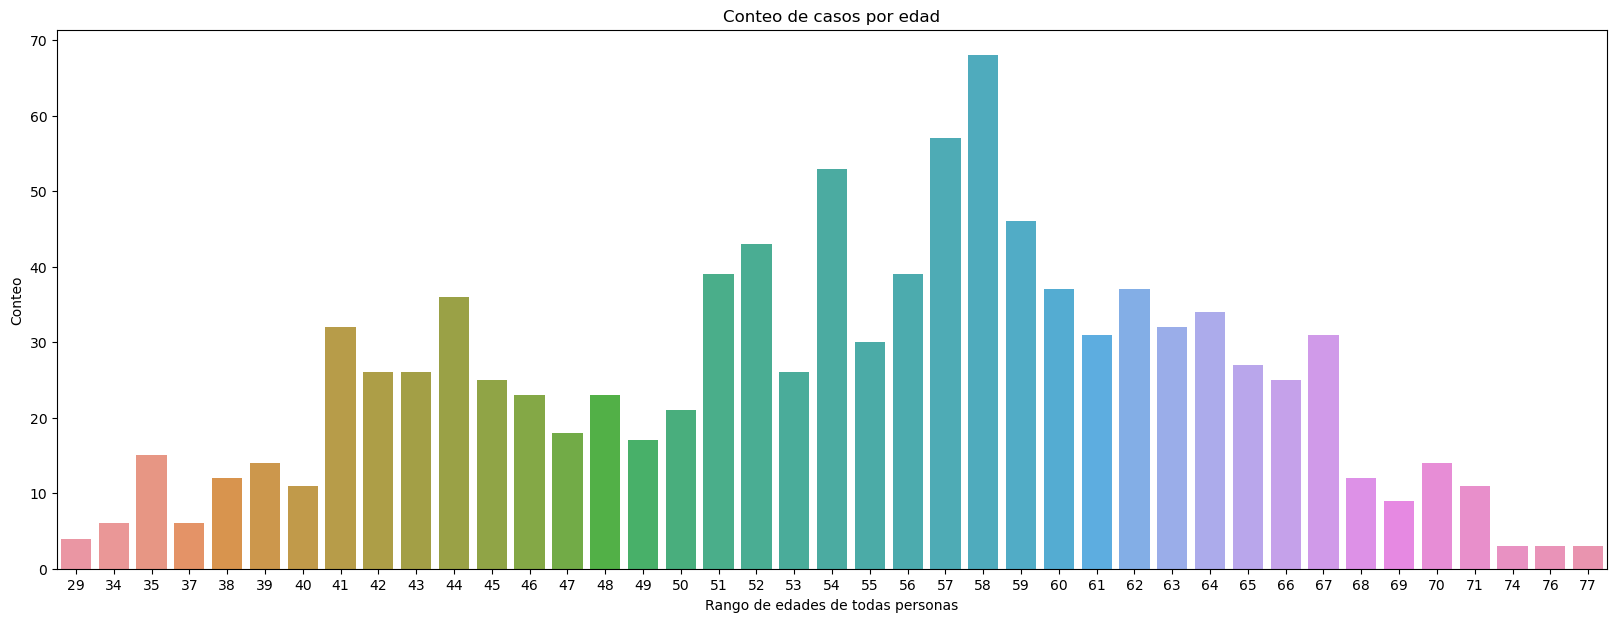

In [12]:
plt.figure(figsize=(20,7))
sns.countplot(x='age', data=df)
# Agregar título y etiquetas de los ejes
plt.title('Conteo de casos por edad')
plt.xlabel('Rango de edades de todas personas')
plt.ylabel('Conteo')

# Mostrar el gráfico
plt.show()

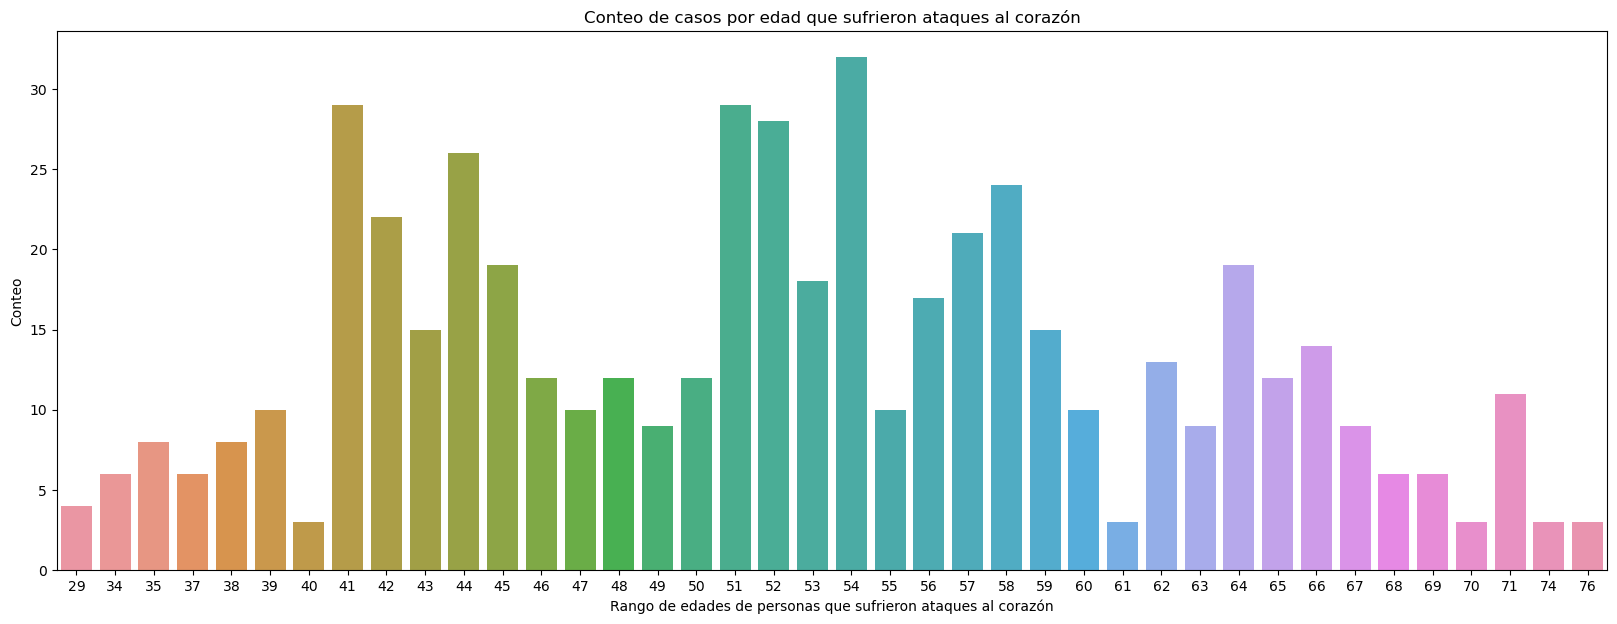

In [13]:
df_ataques = df[df["target"]==1] 
plt.figure(figsize=(20,7))
sns.countplot(x='age', data=df_ataques)
# Agregar título y etiquetas de los ejes
plt.title('Conteo de casos por edad que sufrieron ataques al corazón')
plt.xlabel('Rango de edades de personas que sufrieron ataques al corazón')
plt.ylabel('Conteo')

# Mostrar el gráfico
plt.show()

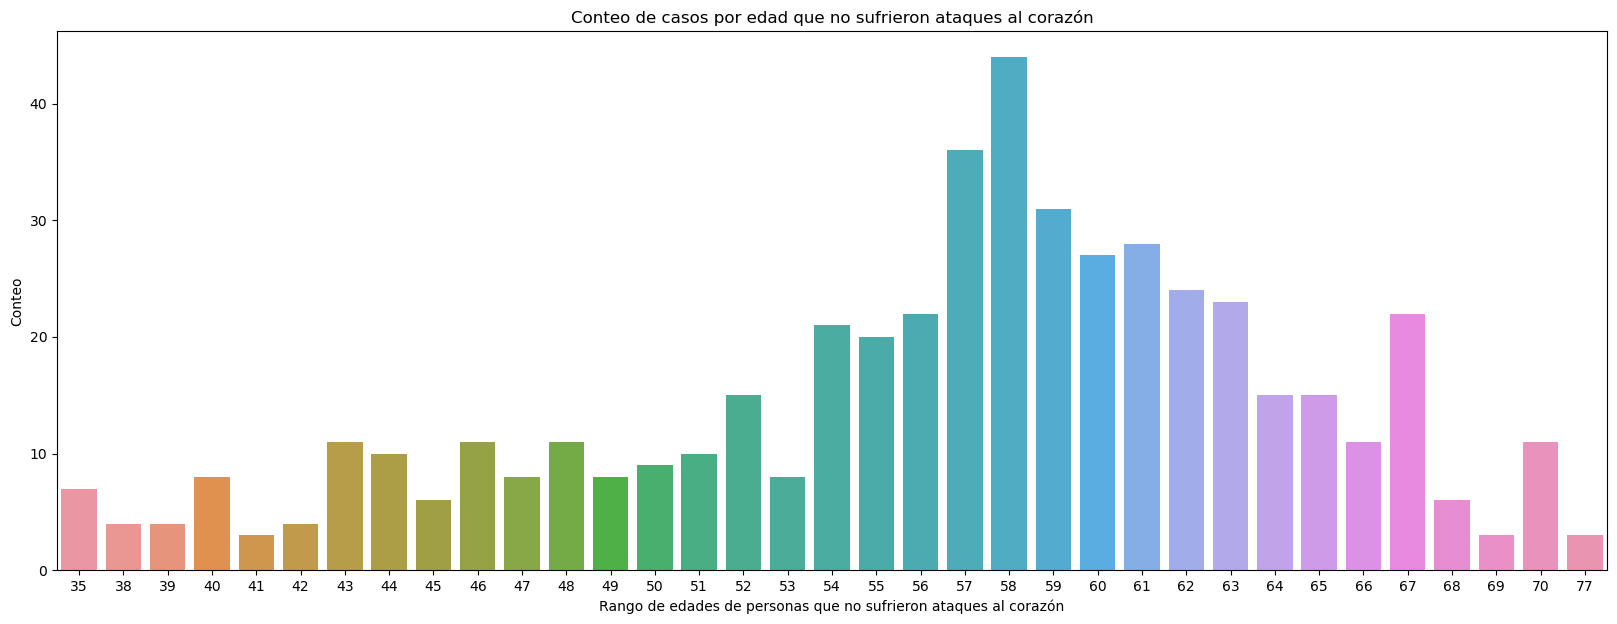

In [14]:
df_sin_ataques = df[df["target"]==0] 
plt.figure(figsize=(20,7))
sns.countplot(x='age', data=df_sin_ataques)
# Agregar título y etiquetas de los ejes
plt.title('Conteo de casos por edad que no sufrieron ataques al corazón')
plt.xlabel('Rango de edades de personas que no sufrieron ataques al corazón')
plt.ylabel('Conteo')

# Mostrar el gráfico
plt.show()

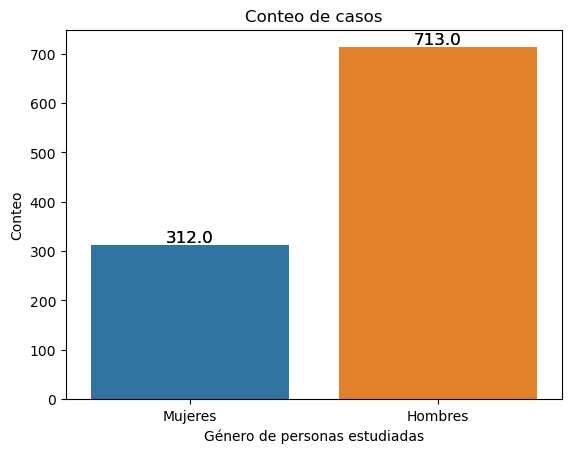

In [15]:
sns.countplot(x='sex', data=df)

# Crear el gráfico de barras para la variable binaria
ax = sns.countplot(x='sex', data=df)
# Personalizar las etiquetas del eje x
plt.xticks([0, 1], ['Mujeres', 'Hombres'])
# Agregar la cantidad en cada barra
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=12)

# Agregar título y etiquetas de los ejes
plt.title('Conteo de casos')
plt.xlabel('Género de personas estudiadas')
plt.ylabel('Conteo')

# Mostrar el gráfico
plt.show()

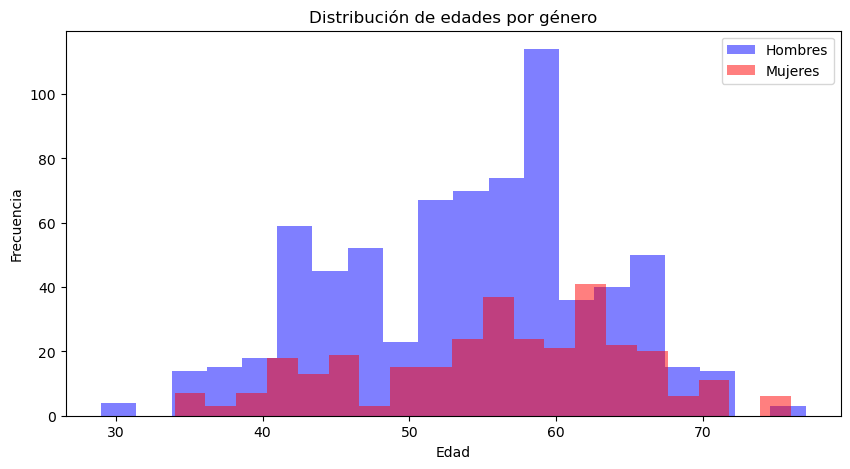

In [16]:
# Histograma para hombres
plt.figure(figsize=(10, 5))
plt.hist(df[df.sex == 1].age, bins=20, color='blue', alpha=0.5, label='Hombres')

# Histograma para mujeres
plt.hist(df[df.sex == 0].age, bins=20, color='red', alpha=0.5, label='Mujeres')

# Agregar título y etiquetas de los ejes
plt.title('Distribución de edades por género')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.legend()

# Mostrar el gráfico
plt.show()

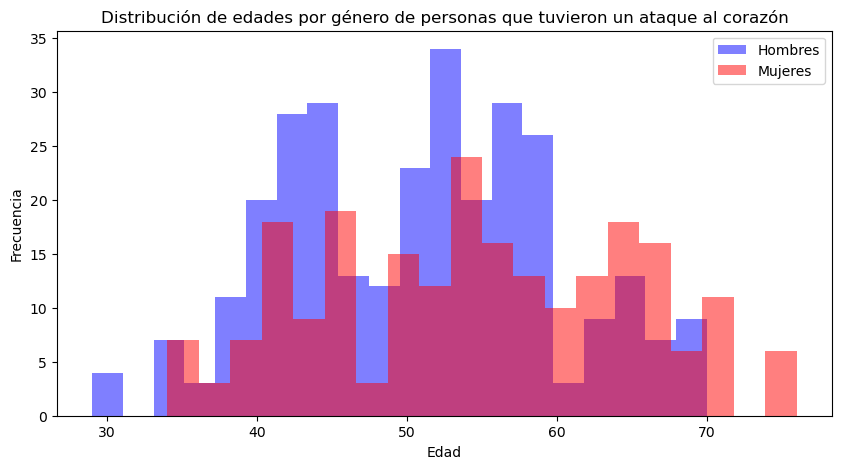

In [17]:
# Histograma para hombres
plt.figure(figsize=(10, 5))
plt.hist(df_ataques[df_ataques.sex == 1].age, bins=20, color='blue', alpha=0.5, label='Hombres')

# Histograma para mujeres
plt.hist(df_ataques[df_ataques.sex == 0].age, bins=20, color='red', alpha=0.5, label='Mujeres')

# Agregar título y etiquetas de los ejes
plt.title('Distribución de edades por género de personas que tuvieron un ataque al corazón')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.legend()

# Mostrar el gráfico
plt.show()

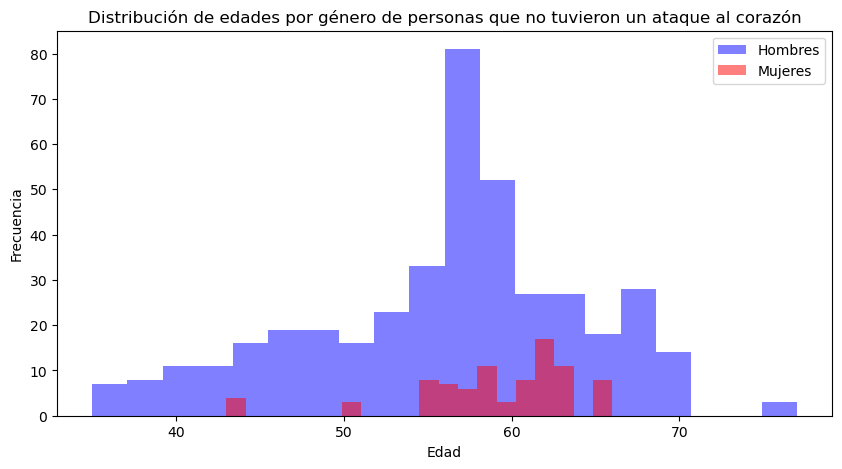

In [18]:
# Histograma para hombres
plt.figure(figsize=(10, 5))
plt.hist(df_sin_ataques[df_sin_ataques.sex == 1].age, bins=20, color='blue', alpha=0.5, label='Hombres')

# Histograma para mujeres
plt.hist(df_sin_ataques[df_sin_ataques.sex == 0].age, bins=20, color='red', alpha=0.5, label='Mujeres')

# Agregar título y etiquetas de los ejes
plt.title('Distribución de edades por género de personas que no tuvieron un ataque al corazón')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.legend()

# Mostrar el gráfico
plt.show()

Hombres con enfermedades al corazón:  0.42075736325385693
Mujeres con enfermedades al corazón:  0.7243589743589743


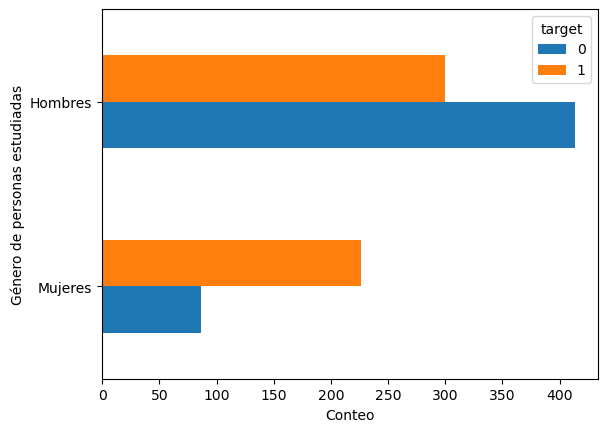

In [19]:
cross_table = pd.crosstab(df.sex, df.target)
cross_table.plot(kind='barh')
plt.ylabel('Género de personas estudiadas')
plt.xlabel('Conteo')
plt.yticks([0, 1], ['Mujeres', 'Hombres'])

print("Hombres con enfermedades al corazón: ",df[(df.sex==1)&(df.target==1)].shape[0]/df[(df.sex==1)].shape[0])
print("Mujeres con enfermedades al corazón: ",df[(df.sex==0)&(df.target==1)].shape[0]/df[(df.sex==0)].shape[0])

Persona Tiene un ataque y presenta dolor: 90.3%


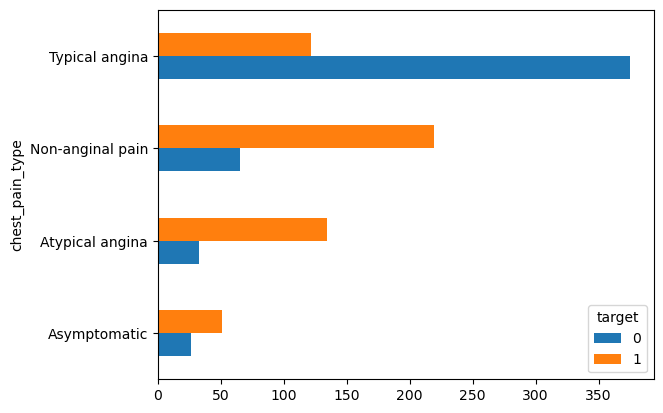

In [20]:
pd.crosstab(df.chest_pain_type, df.target).plot(kind='barh');

print('Persona Tiene un ataque y presenta dolor: {:.4}%'.format(df[(df.target==1) & (df.chest_pain_type!="Asymptomatic")].shape[0]/df[df.target==1].shape[0]*100))

In [21]:
print(df['age'].min())
print(df['age'].max())

29
77


C:\Users\F_cha\AppData\Local\Temp\ipykernel_15580\2479241492.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat_new['age'] = categ


Text(0.5, 0, 'Rangos de edad')

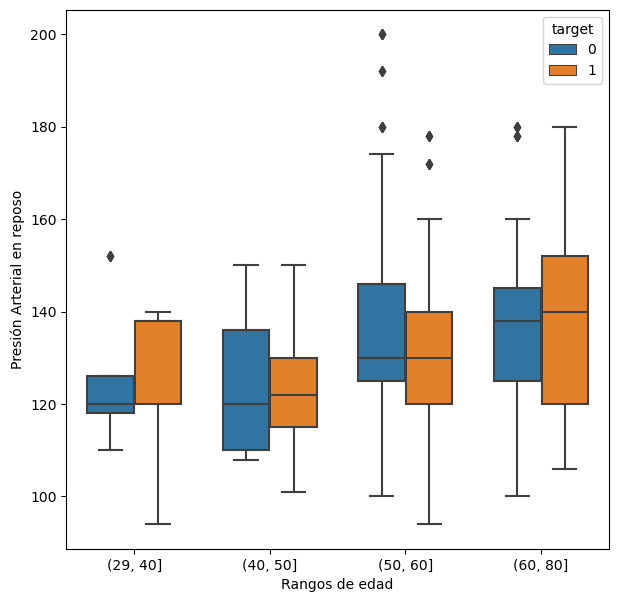

In [22]:
categ = pd.cut(df.age,[29,40,50,60,80])
dat_new = df[['target','resting_blood_pressure']]
dat_new['age'] = categ
plt.figure(figsize=(7,7))
sns.boxplot(x='age',y='resting_blood_pressure',hue='target',data=dat_new, width=0.7)
plt.ylabel('Presión Arterial en reposo')
plt.xlabel('Rangos de edad')

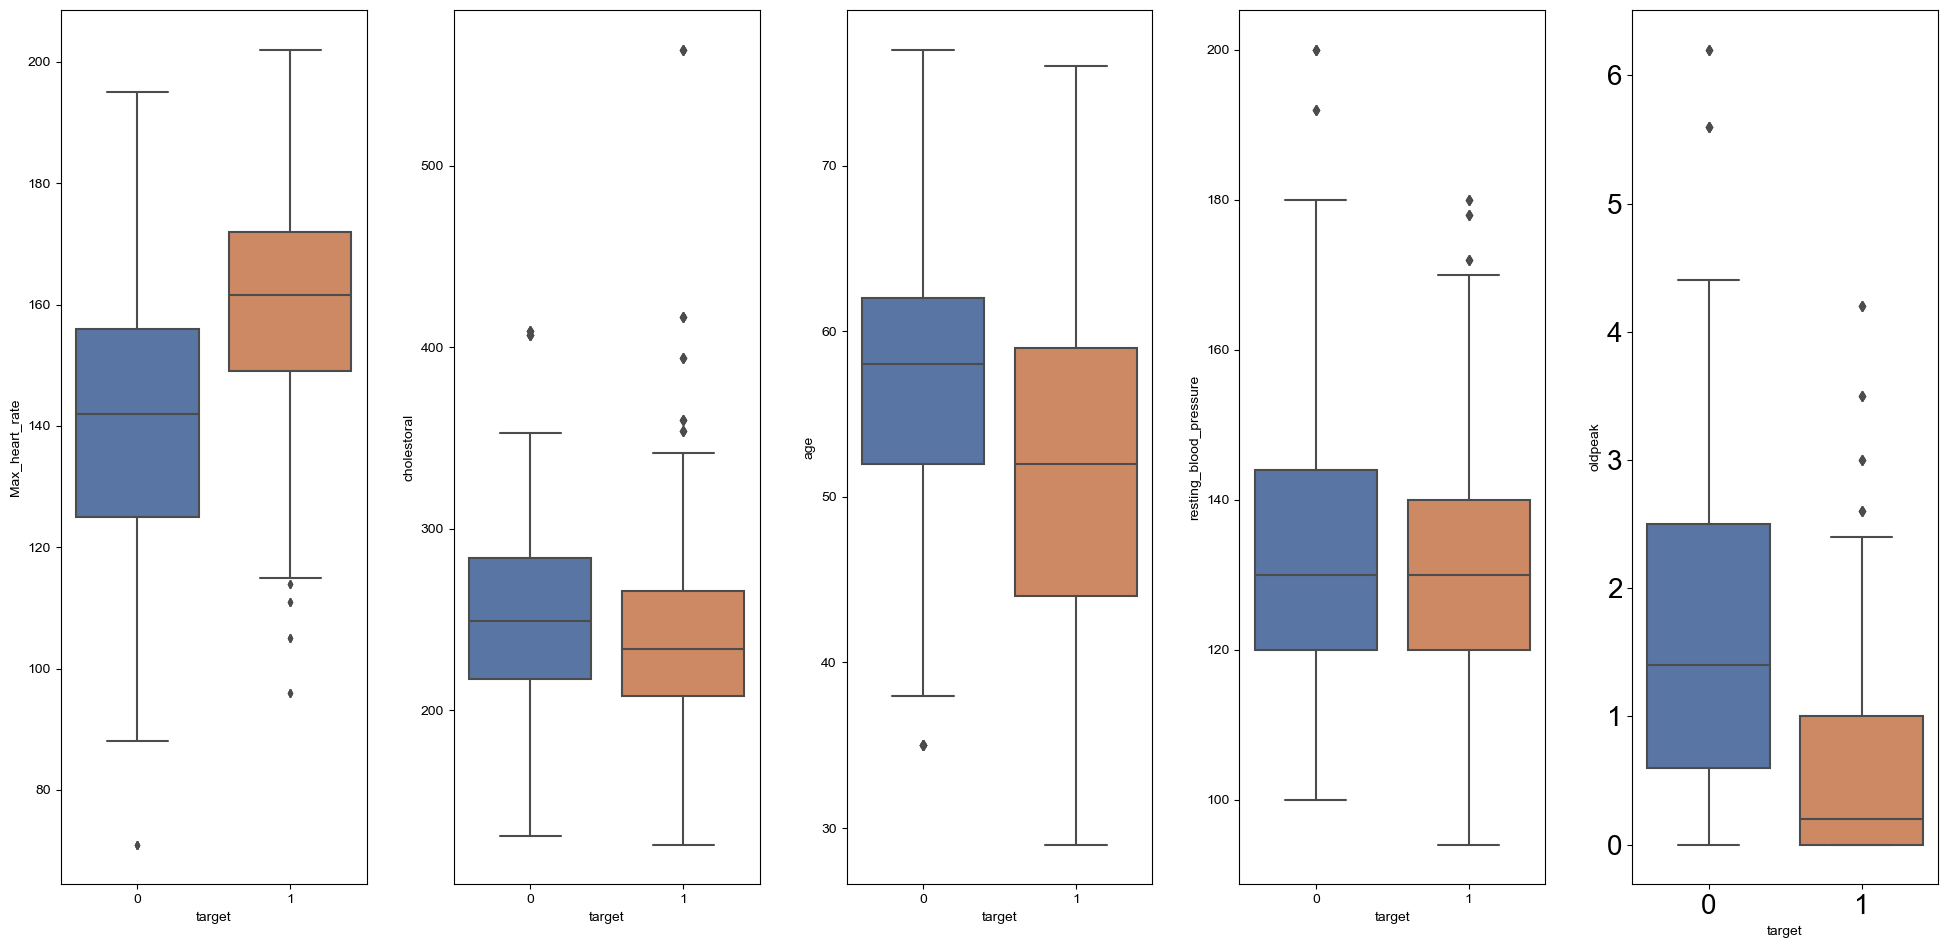

In [23]:
f, axes = plt.subplots(1, 5,figsize=(20,10))
sns.set(font_scale=2)
sns.boxplot(x=df.target, y=df.Max_heart_rate, ax=axes[0],fliersize=4);
sns.boxplot(x=df.target, y=df.cholestoral, ax=axes[1]);
sns.boxplot(x=df.target, y=df.age, ax=axes[2]);
sns.boxplot(x=df.target, y=df.resting_blood_pressure, ax=axes[3]);
sns.boxplot(x=df.target, y=df.oldpeak, ax=axes[4]);
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tight_layout()

# Análisis de predicción con regresión Logística

In [24]:
df.dtypes

age                                int64
sex                                int64
chest_pain_type                   object
resting_blood_pressure             int64
cholestoral                        int64
fasting_blood_sugar                int64
rest_ecg                          object
Max_heart_rate                     int64
exercise_induced_angina            int64
oldpeak                          float64
slope                             object
vessels_colored_by_flourosopy      int64
thalassemia                       object
target                             int64
dtype: object

In [25]:
#### Comenzaremos por transformar las variables chest_pain_type, rest_ecg, slope y thalassemia en variables dummys

df1 = df
dummies = pd.get_dummies(data = df[['chest_pain_type','rest_ecg','slope','thalassemia']], drop_first=True) # Ahora estamos convirtiendo todas estás columnas del df 'Month','DayodMonth','DayOfWeek','Origin','Dest' en dummies 
df1 = pd.concat([dummies,df1], axis=1)                                                                     # con drop_first=True estamos eliminando la primera dummy creada de la primera caetgoria, para no generar multicolinealidad, esto se genera cuado dos variables predictoras están están altamente correlacionadas entre sí. Esto significa que si se incluyen todas las columnas binarias en un modelo, se introduce una dependencia lineal entre ellas, lo que puede conducir a resultados incorrectos o poco confiables.

In [26]:
df1.head(1)

,chest_pain_type_Atypical angina,chest_pain_type_Non-anginal pain,chest_pain_type_Typical angina,rest_ecg_Normal,rest_ecg_ST-T wave abnormality,slope_Flat,slope_Upsloping,thalassemia_No,thalassemia_Normal,thalassemia_Reversable Defect,...,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,0,0,1,0,1,0,0,0,0,1,...,212,0,ST-T wave abnormality,168,0,1.0,Downsloping,2,Reversable Defect,0


In [27]:
df1.dtypes

chest_pain_type_Atypical angina       uint8
chest_pain_type_Non-anginal pain      uint8
chest_pain_type_Typical angina        uint8
rest_ecg_Normal                       uint8
rest_ecg_ST-T wave abnormality        uint8
slope_Flat                            uint8
slope_Upsloping                       uint8
thalassemia_No                        uint8
thalassemia_Normal                    uint8
thalassemia_Reversable Defect         uint8
age                                   int64
sex                                   int64
chest_pain_type                      object
resting_blood_pressure                int64
cholestoral                           int64
fasting_blood_sugar                   int64
rest_ecg                             object
Max_heart_rate                        int64
exercise_induced_angina               int64
oldpeak                             float64
slope                                object
vessels_colored_by_flourosopy         int64
thalassemia                     

In [28]:
df1 = df1.drop(columns=['chest_pain_type','rest_ecg','slope','thalassemia']) # Eliminamos las variables originales que transformamos en dummys

In [29]:
df1.dtypes

chest_pain_type_Atypical angina       uint8
chest_pain_type_Non-anginal pain      uint8
chest_pain_type_Typical angina        uint8
rest_ecg_Normal                       uint8
rest_ecg_ST-T wave abnormality        uint8
slope_Flat                            uint8
slope_Upsloping                       uint8
thalassemia_No                        uint8
thalassemia_Normal                    uint8
thalassemia_Reversable Defect         uint8
age                                   int64
sex                                   int64
resting_blood_pressure                int64
cholestoral                           int64
fasting_blood_sugar                   int64
Max_heart_rate                        int64
exercise_induced_angina               int64
oldpeak                             float64
vessels_colored_by_flourosopy         int64
target                                int64
dtype: object

In [30]:
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix 
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler

In [31]:
df1 = df1.sample(frac=1, random_state=42)
df1 = df1.reset_index()
df1 = df1.drop(columns=['index'])

In [32]:
X = df1.drop("target", axis=1)
y = df1['target']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
X_scaled = X_train[['age','resting_blood_pressure','cholestoral','Max_heart_rate','oldpeak','vessels_colored_by_flourosopy']]
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_scaled)

In [34]:
# Lista con los nombres de columna
column_names = ['age', 'resting_blood_pressure', 'cholestoral', 'Max_heart_rate', 'oldpeak', 'vessels_colored_by_flourosopy']
# Crear el DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=column_names)

In [35]:
X_eliminadas=X_train.drop(columns=column_names)
X_eliminadas = X_eliminadas.reset_index().drop(columns=['index'])

In [36]:
X_train_scaled = pd.concat([X_train_scaled,X_eliminadas], axis=1)

In [37]:
modelo = LogisticRegressionCV(cv=5,max_iter=1000)
modelo.fit(X_train_scaled, y_train)

LogisticRegressionCV(cv=5, max_iter=1000)

In [38]:
valores_C = modelo.Cs_

print("Valores de C probados por el modelo:", valores_C)

Valores de C probados por el modelo: [1.00000000e-04 7.74263683e-04 5.99484250e-03 4.64158883e-02
 3.59381366e-01 2.78255940e+00 2.15443469e+01 1.66810054e+02
 1.29154967e+03 1.00000000e+04]


In [40]:
best_C = modelo.C_[0]
np.log10(best_C)

2.2222222222222214

In [42]:
# Cambiar temporalmente la dimensión del gráfico
with plt.rc_context({'figure.figsize': (6.4, 4.8)}):  # Tamaño temporal: 6.4 pulgadas de ancho y 4.8 pulgadas de alto
    # Código para crear y mostrar otro gráfico aquí
    # Por ejemplo:
    # plt.plot(x2, y2)
    plt.show()

# Restaurar la dimensión por defecto de los gráficos
plt.rcdefaults()

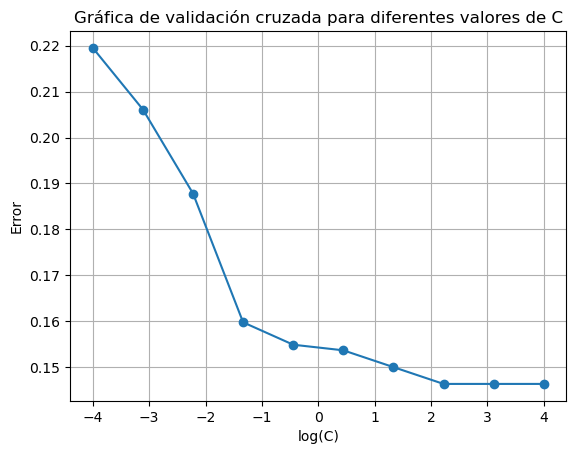

In [43]:
C_values = modelo.Cs_

# Obtenemos el valor de C seleccionado por el modelo
best_C = modelo.C_[0]

scores_mean = np.mean(modelo.scores_[1], axis=0)

# Calculamos el error como 1 - precisión
errors = 1 - scores_mean

# Graficamos los resultados
plt.plot(np.log10(C_values), errors, 'o-')
plt.xlabel('log(C)')
plt.ylabel('Error')
plt.title('Gráfica de validación cruzada para diferentes valores de C')
plt.grid()
plt.show()

In [44]:
coef_modelo = modelo.coef_
variable_names = X_train.columns

print("coefficients:")
for coef, name in zip(coef_modelo[0], variable_names):
    print(name + ": " + str(coef))

coefficients:
chest_pain_type_Atypical angina: -0.02385773108954197
chest_pain_type_Non-anginal pain: -0.23471735705024319
chest_pain_type_Typical angina: -0.24837382845926378
rest_ecg_Normal: 0.2950090697509212
rest_ecg_ST-T wave abnormality: -0.6056867082668999
slope_Flat: -0.8576415790780848
slope_Upsloping: -0.8034823628306285
thalassemia_No: 0.2787586061276173
thalassemia_Normal: -1.8747556155054872
thalassemia_Reversable Defect: 0.29202610065592877
age: 0.939464458394121
sex: -0.8911704480014047
resting_blood_pressure: -0.6000407647422116
cholestoral: -1.8478642342926348
fasting_blood_sugar: -0.011012874029934774
Max_heart_rate: -1.4455682714124942
exercise_induced_angina: -1.405418558766104
oldpeak: 0.059712621407435156
vessels_colored_by_flourosopy: -0.6367234252589682


In [45]:
X_train["probabilidad"] = modelo.predict_proba(X_train_scaled)[:, 1]

In [46]:
X_train["probabilidad"]

835    0.096106
137    0.754139
534    0.036186
495    0.765419
244    0.029311
         ...   
700    0.294189
71     0.003197
106    0.005731
270    0.049768
860    0.051871
Name: probabilidad, Length: 820, dtype: float64

In [47]:
y_train = pd.DataFrame({"target": y_train}) # lA pasamos a dataframe

In [48]:
entr = pd.concat([X_train,y_train], axis=1)

In [49]:
entr

,chest_pain_type_Atypical angina,chest_pain_type_Non-anginal pain,chest_pain_type_Typical angina,rest_ecg_Normal,rest_ecg_ST-T wave abnormality,slope_Flat,slope_Upsloping,thalassemia_No,thalassemia_Normal,thalassemia_Reversable Defect,...,sex,resting_blood_pressure,cholestoral,fasting_blood_sugar,Max_heart_rate,exercise_induced_angina,oldpeak,vessels_colored_by_flourosopy,probabilidad,target
835,0,0,1,0,1,1,0,0,0,1,...,1,120,198,0,130,1,1.6,0,0.096106,0
137,0,1,0,1,0,1,0,0,0,0,...,1,125,245,1,166,0,2.4,0,0.754139,1
534,1,0,0,0,1,1,0,0,0,1,...,1,125,220,0,144,0,0.4,4,0.036186,1
495,1,0,0,1,0,0,0,0,0,0,...,0,136,319,1,152,0,0.0,2,0.765419,0
244,0,0,1,1,0,0,1,0,0,1,...,1,130,283,1,103,1,1.6,0,0.029311,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,0,1,0,0,1,1,0,0,0,1,...,1,125,309,0,131,1,1.8,0,0.294189,0
71,0,0,1,1,0,1,0,0,0,1,...,0,150,407,0,154,0,4.0,3,0.003197,0
106,0,0,1,1,0,1,0,0,0,1,...,1,130,206,0,132,1,2.4,2,0.005731,0
270,0,0,1,1,0,1,0,0,0,1,...,0,132,341,1,136,1,3.0,0,0.049768,0


In [50]:
entr_sorted = entr.sort_values("probabilidad", ascending=False)  # Ordenamos de mayor a menor probabilidad
falsos_positivos = 0.2 # elegir la cantidad maxima de falsos positivos
max_false_positives = int(falsos_positivos * entr[entr["target"] == 0].shape[0])  # Máximo 20% de falsos positivos

false_positives = 0
threshold = None

for _, row in entr_sorted.iterrows():
    if row["target"] == 0:
        false_positives += 1
        if false_positives > max_false_positives:
            threshold = row["probabilidad"]
            break

print("Umbral de probabilidad de corte para un máximo del",falsos_positivos*100,"% de falsos positivos es:", threshold)

Umbral de probabilidad de corte para un máximo del 20.0 % de falsos positivos es: 0.4057876366100234


In [51]:
# Cambiar temporalmente la dimensión del gráfico
with plt.rc_context({'figure.figsize': (6.4, 4.8)}):  # Tamaño temporal: 6.4 pulgadas de ancho y 4.8 pulgadas de alto
    # Código para crear y mostrar otro gráfico aquí
    # Por ejemplo:
    # plt.plot(x2, y2)
    plt.show()

# Restaurar la dimensión por defecto de los gráficos
plt.rcdefaults()

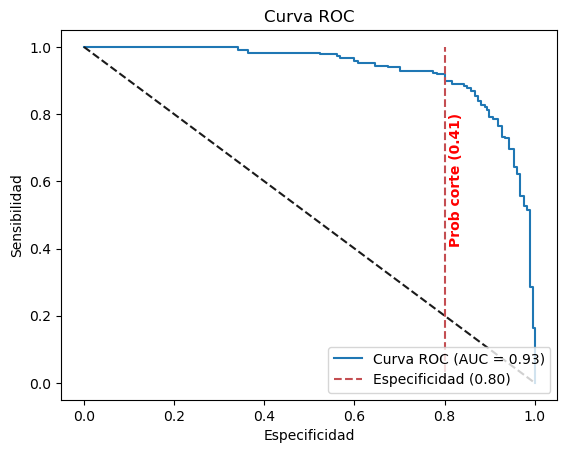

In [52]:
# Calcula la tasa de falsos positivos y la tasa de verdaderos positivos
fpr, tpr, thresholds = roc_curve(y_train["target"], X_train["probabilidad"])

auc = roc_auc_score(entr["target"], entr["probabilidad"])

# Calcula la especificidad como 1 - tasa de falsos positivos
specificity = 1 - fpr

specificity_value = 1 - falsos_positivos
# Grafica la curva ROC
plt.plot(specificity, tpr, label="Curva ROC (AUC = {:.2f})".format(auc))
plt.plot([0, 1], [1, 0], "k--")  # Línea diagonal (AUC = 0.5)
plt.plot([specificity_value, specificity_value], [0, 1], "r--", label="Especificidad ({:.2f})".format(specificity_value))
plt.xlabel("Especificidad")
plt.ylabel("Sensibilidad")
plt.title("Curva ROC")
plt.legend(loc="lower right")

# Agregar el valor del umbral por delante de la línea punteada roja (en forma vertical)
plt.text(specificity_value + 0.01, threshold, "Prob corte ({:.2f})".format(threshold), color="red", ha="left", va="bottom", fontsize=10, weight='bold', rotation=90)

plt.show()

In [53]:
X_scaled = X_valid[['age','resting_blood_pressure','cholestoral','Max_heart_rate','oldpeak','vessels_colored_by_flourosopy']]

scaler = StandardScaler()
X_valid_scaled = scaler.fit_transform(X_scaled)
# Lista con los nombres de columna
column_names = ['age', 'resting_blood_pressure', 'cholestoral', 'Max_heart_rate', 'oldpeak', 'vessels_colored_by_flourosopy']

# Crear el DataFrame
X_valid_scaled = pd.DataFrame(X_valid_scaled, columns=column_names)
X_eliminadas=X_valid.drop(columns=column_names)
X_eliminadas = X_eliminadas.reset_index().drop(columns=['index'])
X_valid_scaled = pd.concat([X_valid_scaled,X_eliminadas], axis=1)
X_valid_scaled

,age,resting_blood_pressure,cholestoral,Max_heart_rate,oldpeak,vessels_colored_by_flourosopy,chest_pain_type_Atypical angina,chest_pain_type_Non-anginal pain,chest_pain_type_Typical angina,rest_ecg_Normal,rest_ecg_ST-T wave abnormality,slope_Flat,slope_Upsloping,thalassemia_No,thalassemia_Normal,thalassemia_Reversable Defect,sex,fasting_blood_sugar,exercise_induced_angina
0,-2.027232,-0.719241,-0.678579,1.910204,-0.273600,-0.680960,1,0,0,0,1,0,0,0,0,0,0,0,0
1,-1.321488,-1.171352,-0.247848,0.221562,-0.933458,-0.680960,1,0,0,0,1,0,0,0,0,0,1,0,0
2,-0.111640,0.411034,-0.265078,0.524651,-0.933458,-0.680960,0,0,1,1,0,0,0,0,0,0,0,0,0
3,-0.313282,0.524062,1.009884,-0.254722,0.480524,0.337995,0,1,0,1,0,0,0,0,0,0,0,0,0
4,-0.111640,-0.041076,-0.902558,0.178263,0.197728,-0.680960,0,1,0,1,0,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.392463,-0.154103,0.165653,-0.774304,1.894506,1.356950,0,0,1,1,0,1,0,0,0,1,1,0,1
201,-1.523129,-0.719241,-0.523516,-0.341319,0.197728,-0.680960,0,0,1,0,1,1,0,0,0,1,1,0,0
202,-0.313282,0.524062,1.009884,-0.254722,0.480524,0.337995,0,1,0,1,0,0,0,0,0,0,0,0,0
203,0.493283,0.524062,-1.247143,0.611248,-0.933458,0.337995,0,0,1,0,1,0,0,0,0,1,1,0,1


In [54]:
y_valid = pd.DataFrame({"target": y_valid}) # lA pasamos a dataframe

valid = pd.concat([X_valid,y_valid], axis=1)

In [55]:
valid["probabilidad"] = modelo.predict_proba(X_valid_scaled)[:, 1]
valid["prediccion"] = np.where(valid["probabilidad"] >= threshold, 1, 0)

In [56]:
valid

,chest_pain_type_Atypical angina,chest_pain_type_Non-anginal pain,chest_pain_type_Typical angina,rest_ecg_Normal,rest_ecg_ST-T wave abnormality,slope_Flat,slope_Upsloping,thalassemia_No,thalassemia_Normal,thalassemia_Reversable Defect,...,resting_blood_pressure,cholestoral,fasting_blood_sugar,Max_heart_rate,exercise_induced_angina,oldpeak,vessels_colored_by_flourosopy,target,probabilidad,prediccion
527,1,0,0,0,1,0,0,0,0,0,...,118,210,0,192,0,0.7,0,1,0.986976,1
359,1,0,0,0,1,0,0,0,0,0,...,110,235,0,153,0,0.0,0,1,0.943011,1
447,0,0,1,1,0,0,0,0,0,0,...,138,234,0,160,0,0.0,0,1,0.899017,1
31,0,1,0,1,0,0,0,0,0,0,...,140,308,0,142,0,1.5,1,1,0.885058,1
621,0,1,0,1,0,0,1,0,0,0,...,130,197,1,152,0,1.2,0,1,0.866601,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
832,0,0,1,1,0,1,0,0,0,1,...,128,259,0,130,1,3.0,2,0,0.002417,0
796,0,0,1,0,1,1,0,0,0,1,...,118,219,0,140,0,1.2,0,0,0.184549,0
644,0,1,0,1,0,0,0,0,0,0,...,140,308,0,142,0,1.5,1,1,0.885058,1
404,0,0,1,0,1,0,0,0,0,1,...,140,177,0,162,1,0.0,1,0,0.214279,0


In [57]:
accuracy = accuracy_score(valid["target"], valid["prediccion"])
print(" ")
print("Accuracy:", accuracy)
print(" ")
print(valid["target"].value_counts())
print(" ")
print(valid["prediccion"].value_counts())


val_0 = valid[valid["target"] == 0]
val_1 = valid[valid["target"] == 1]
spec = sum(val_0["target"] == val_0["prediccion"]) / len(val_0["target"])
print("especificidad", spec)
print(" ")
sens = sum(val_1["target"] == val_1["prediccion"]) / len(val_1["target"])
print("sensibilidad", sens)
print(" ")
F1 = 2 / ((1 / sens) + 1 /(spec))
print("Media Armonica F1:", F1)
print(" ")
# Matriz de confusión
confusion = confusion_matrix(valid["target"], valid["prediccion"])
print("Matriz de Confusión:")
labels = ['0 (Real)', '1 (Real)']
print(pd.DataFrame(confusion, columns=['0 (Predicho)', '1 (Predicho)'], index=labels))

 
Accuracy: 0.8439024390243902
 
1    113
0     92
Name: target, dtype: int64
 
1    127
0     78
Name: prediccion, dtype: int64
especificidad 0.75
 
sensibilidad 0.9203539823008849
 
Media Armonica F1: 0.8264900662251656
 
Matriz de Confusión:
          0 (Predicho)  1 (Predicho)
0 (Real)            69            23
1 (Real)             9           104


In [ ]:
####################### Otra opción es fijarnos en el F1
#==============================================================================

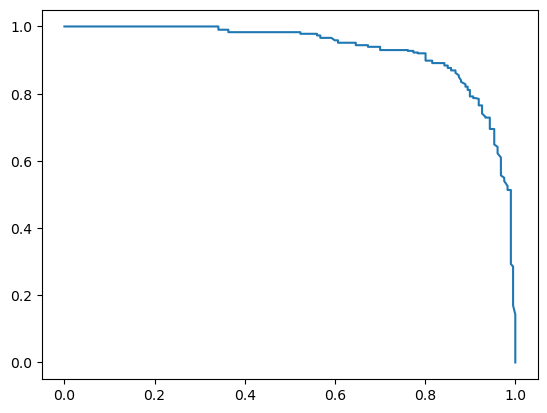

In [58]:
vector_sens = []
vector_spec = []
for p0 in np.linspace(0, 1, num=1000):
    entr["prediccion"] = np.where(entr["probabilidad"] >= p0, 1, 0)

    entr_0 = entr[entr["target"] == 0]
    spec = sum(entr_0["target"] == entr_0["prediccion"]) / len(entr_0["target"])
    entr_1 = entr[entr["target"] == 1]
    sens = sum(entr_1["target"] == entr_1["prediccion"]) / len(entr_1["target"])

    vector_sens.append(sens)
    vector_spec.append(spec)

plt.plot(vector_spec, vector_sens, linestyle="solid")
plt.show()

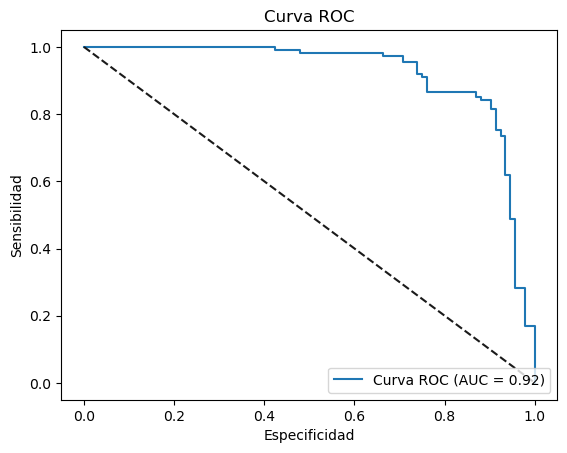

In [59]:
# Calcula la tasa de verdaderos positivos y la tasa de falsos positivos
fpr, tpr, thresholds = roc_curve(valid["target"], valid["probabilidad"])

# Calcula el área bajo la curva ROC (AUC-ROC)
auc = roc_auc_score(valid["target"], valid["probabilidad"])

# Calcula la especificidad como 1 - tasa de falsos positivos
specificity = 1 - fpr

# Grafica la curva ROC
plt.plot(specificity, tpr, label="Curva ROC (AUC = {:.2f})".format(auc))
plt.plot([0, 1], [1, 0], "k--")  # Línea diagonal (AUC = 0.5)
plt.xlabel("Especificidad")
plt.ylabel("Sensibilidad")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.show()

In [60]:
F1 = 2 / (1 / np.array(vector_sens) + 1 / np.array(vector_spec))
print(F1)
print(" ")
print(np.linspace(0, 1, num=1000))
max_index = np.argmax(F1)
print(" ")
print(max_index)

[0.         0.01463415 0.01463415 0.04326923 0.12873563 0.15
 0.20704846 0.24568966 0.24568966 0.27906977 0.31469979 0.31469979
 0.31469979 0.32510288 0.36546185 0.3752495  0.38811881 0.38811881
 0.38811881 0.40078585 0.40078585 0.41325536 0.43761996 0.43761996
 0.43761996 0.43761996 0.43761996 0.43761996 0.43761996 0.43761996
 0.46124764 0.48134328 0.48698885 0.49815498 0.49815498 0.50915751
 0.50915751 0.50789297 0.52666905 0.53194603 0.53089245 0.53611043
 0.53611043 0.54386664 0.54386664 0.54386664 0.54899087 0.55912935
 0.57406796 0.58385204 0.59827297 0.59827297 0.61934885 0.61934885
 0.61934885 0.62623055 0.63529749 0.63529749 0.63529749 0.63754509
 0.63754509 0.64201757 0.64201757 0.64201757 0.65087282 0.65087282
 0.65306815 0.66177669 0.66177669 0.66177669 0.66177669 0.66177669
 0.66177669 0.66823266 0.66823266 0.67462504 0.67462504 0.67885175
 0.67885175 0.67885175 0.67885175 0.67885175 0.68305089 0.68187815
 0.69426974 0.69426974 0.70037561 0.70037561 0.70037561 0.70037561
 

C:\Users\F_cha\AppData\Local\Temp\ipykernel_15580\212541970.py:1: RuntimeWarning: divide by zero encountered in divide
  F1 = 2 / (1 / np.array(vector_sens) + 1 / np.array(vector_spec))


In [61]:
print(F1[max_index])

0.8682845612568602


In [62]:
my_array = np.linspace(0, 1, num=1000)
valor_en_posicion_max_index = my_array[max_index]

print(valor_en_posicion_max_index)

0.5785785785785785


In [63]:
valid["prediccion"] = np.where(valid["probabilidad"] >= valor_en_posicion_max_index, 1, 0)

In [64]:
accuracy = accuracy_score(valid["target"], valid["prediccion"])
print(" ")
print("Accuracy:", accuracy)
print(" ")
print(valid["target"].value_counts())
print(" ")
print(valid["prediccion"].value_counts())


val_0 = valid[valid["target"] == 0]
val_1 = valid[valid["target"] == 1]
spec = sum(val_0["target"] == val_0["prediccion"]) / len(val_0["target"])
print("especificidad", spec)
print(" ")
sens = sum(val_1["target"] == val_1["prediccion"]) / len(val_1["target"])
print("sensibilidad", sens)
print(" ")
F1 = 2 / ((1 / sens) + 1 /(spec))
print("Media Armonica F1:", F1)
print(" ")
# Matriz de confusión
confusion = confusion_matrix(valid["target"], valid["prediccion"])
print("Matriz de Confusión:")
labels = ['0 (Real)', '1 (Real)']
print(pd.DataFrame(confusion, columns=['0 (Predicho)', '1 (Predicho)'], index=labels))

 
Accuracy: 0.8585365853658536
 
1    113
0     92
Name: target, dtype: int64
 
1    108
0     97
Name: prediccion, dtype: int64
especificidad 0.8695652173913043
 
sensibilidad 0.8495575221238938
 
Media Armonica F1: 0.8594449418084154
 
Matriz de Confusión:
          0 (Predicho)  1 (Predicho)
0 (Real)            80            12
1 (Real)            17            96
